In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,transform=transforms.ToTensor(),download=True)
testset=torchvision.datasets.CIFAR10(root="./data",train=False,transform=transforms.ToTensor(),download=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12833247.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_loader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [5]:
dataiter=iter(train_loader)

In [6]:
images,labels=next(dataiter)

print(images.shape,images[0].shape,labels[0])

torch.Size([4, 3, 32, 32]) torch.Size([3, 32, 32]) tensor(8)


In [7]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))

  def forward(self,X):
    return self.conv1(X)


In [8]:
net=FirstCNN()
out=net(images)

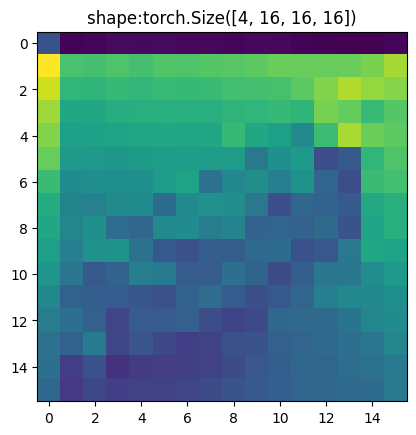

In [9]:
plt.imshow(out[0,1,:,:].detach().numpy())
plt.title(f"shape:{out.shape}")
plt.show()

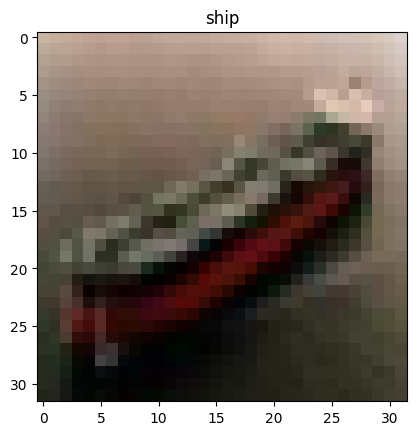

In [10]:
plt.imshow(np.transpose(images[0],(1,2,0)))
plt.title(classes[labels[0].item()])
plt.show()

In [11]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=8,kernel_size=5), # [N,3,32,32] - > [N,8,28,28]
        nn.AvgPool2d(2,stride=2), # [N,8,28,28] - > [N,8,14,14]
        nn.Conv2d(in_channels=8,out_channels=16,kernel_size=5), # [N,8,14,14] - > [N,16,10,10]
        nn.AvgPool2d(2,stride=2), # [N,16,10,10] - > [ N,16,5,5 ]
    )

  def forward(self,X):
    return self.model(X)

In [12]:
deepnet=DeepCNN()

In [13]:
deepnet(images).shape

torch.Size([4, 16, 5, 5])

In [14]:
class Lenet(nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    self.conv_layer=nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=2),
        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=2)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )

  def forward(self,X):
    X=self.conv_layer(X)
    X=X.reshape(X.shape[0],-1)
    X=self.fc_layer(X)
    return X

In [15]:
batch_size=128
train_loader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
test_loader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False)

In [22]:
import torch.optim as optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model=Lenet()
model.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

cuda:0


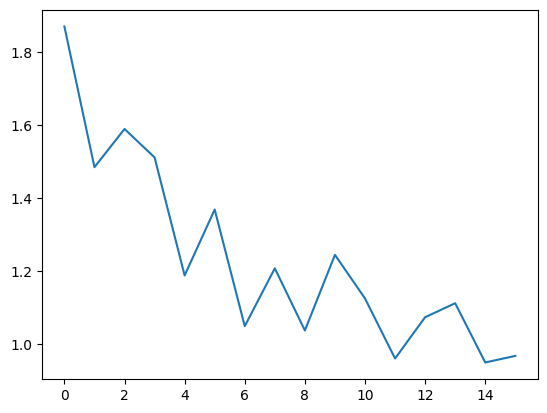

In [23]:
losses=[]
losses_epoch_arr=[]
max_epochs=16

for epoch in range(max_epochs):
  for data,labels in train_loader:
    optimizer.zero_grad()
    outputs=model(data.to(device))
    loss=criterion(outputs,labels.to(device))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  losses_epoch_arr.append(loss.item())

plt.plot(losses_epoch_arr)
plt.show()